In [ ]:
import keras
from keras import layers

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [ ]:
# This is our input image
input_img = keras.Input(shape=(784,))

In [ ]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [ ]:
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [ ]:
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


In [ ]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Now let's train our autoencoder for 50 epochs:

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3501 - val_loss: 0.0598
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0278 - val_loss: 0.0135
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0100 - val_loss: 0.0076
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0044 - val_lo

After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.


In short, an 'encoder' is a component in machine learning used to convert input data (e.g., text, images, or numerical values) into a different representation, typically a numerical one. It's often used in various tasks like data compression, feature extraction, and creating embeddings for downstream applications.

In short, a 'decoder' is a component in machine learning used to convert a hidden representation or encoded data back into a more understandable or original format. It's commonly used in tasks like language translation, image generation, and sequence-to-sequence tasks.

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


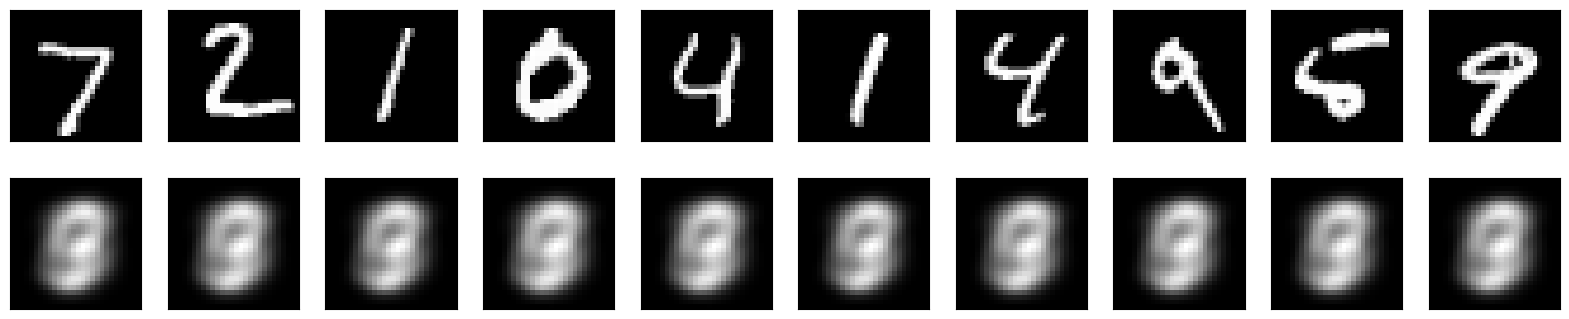

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.